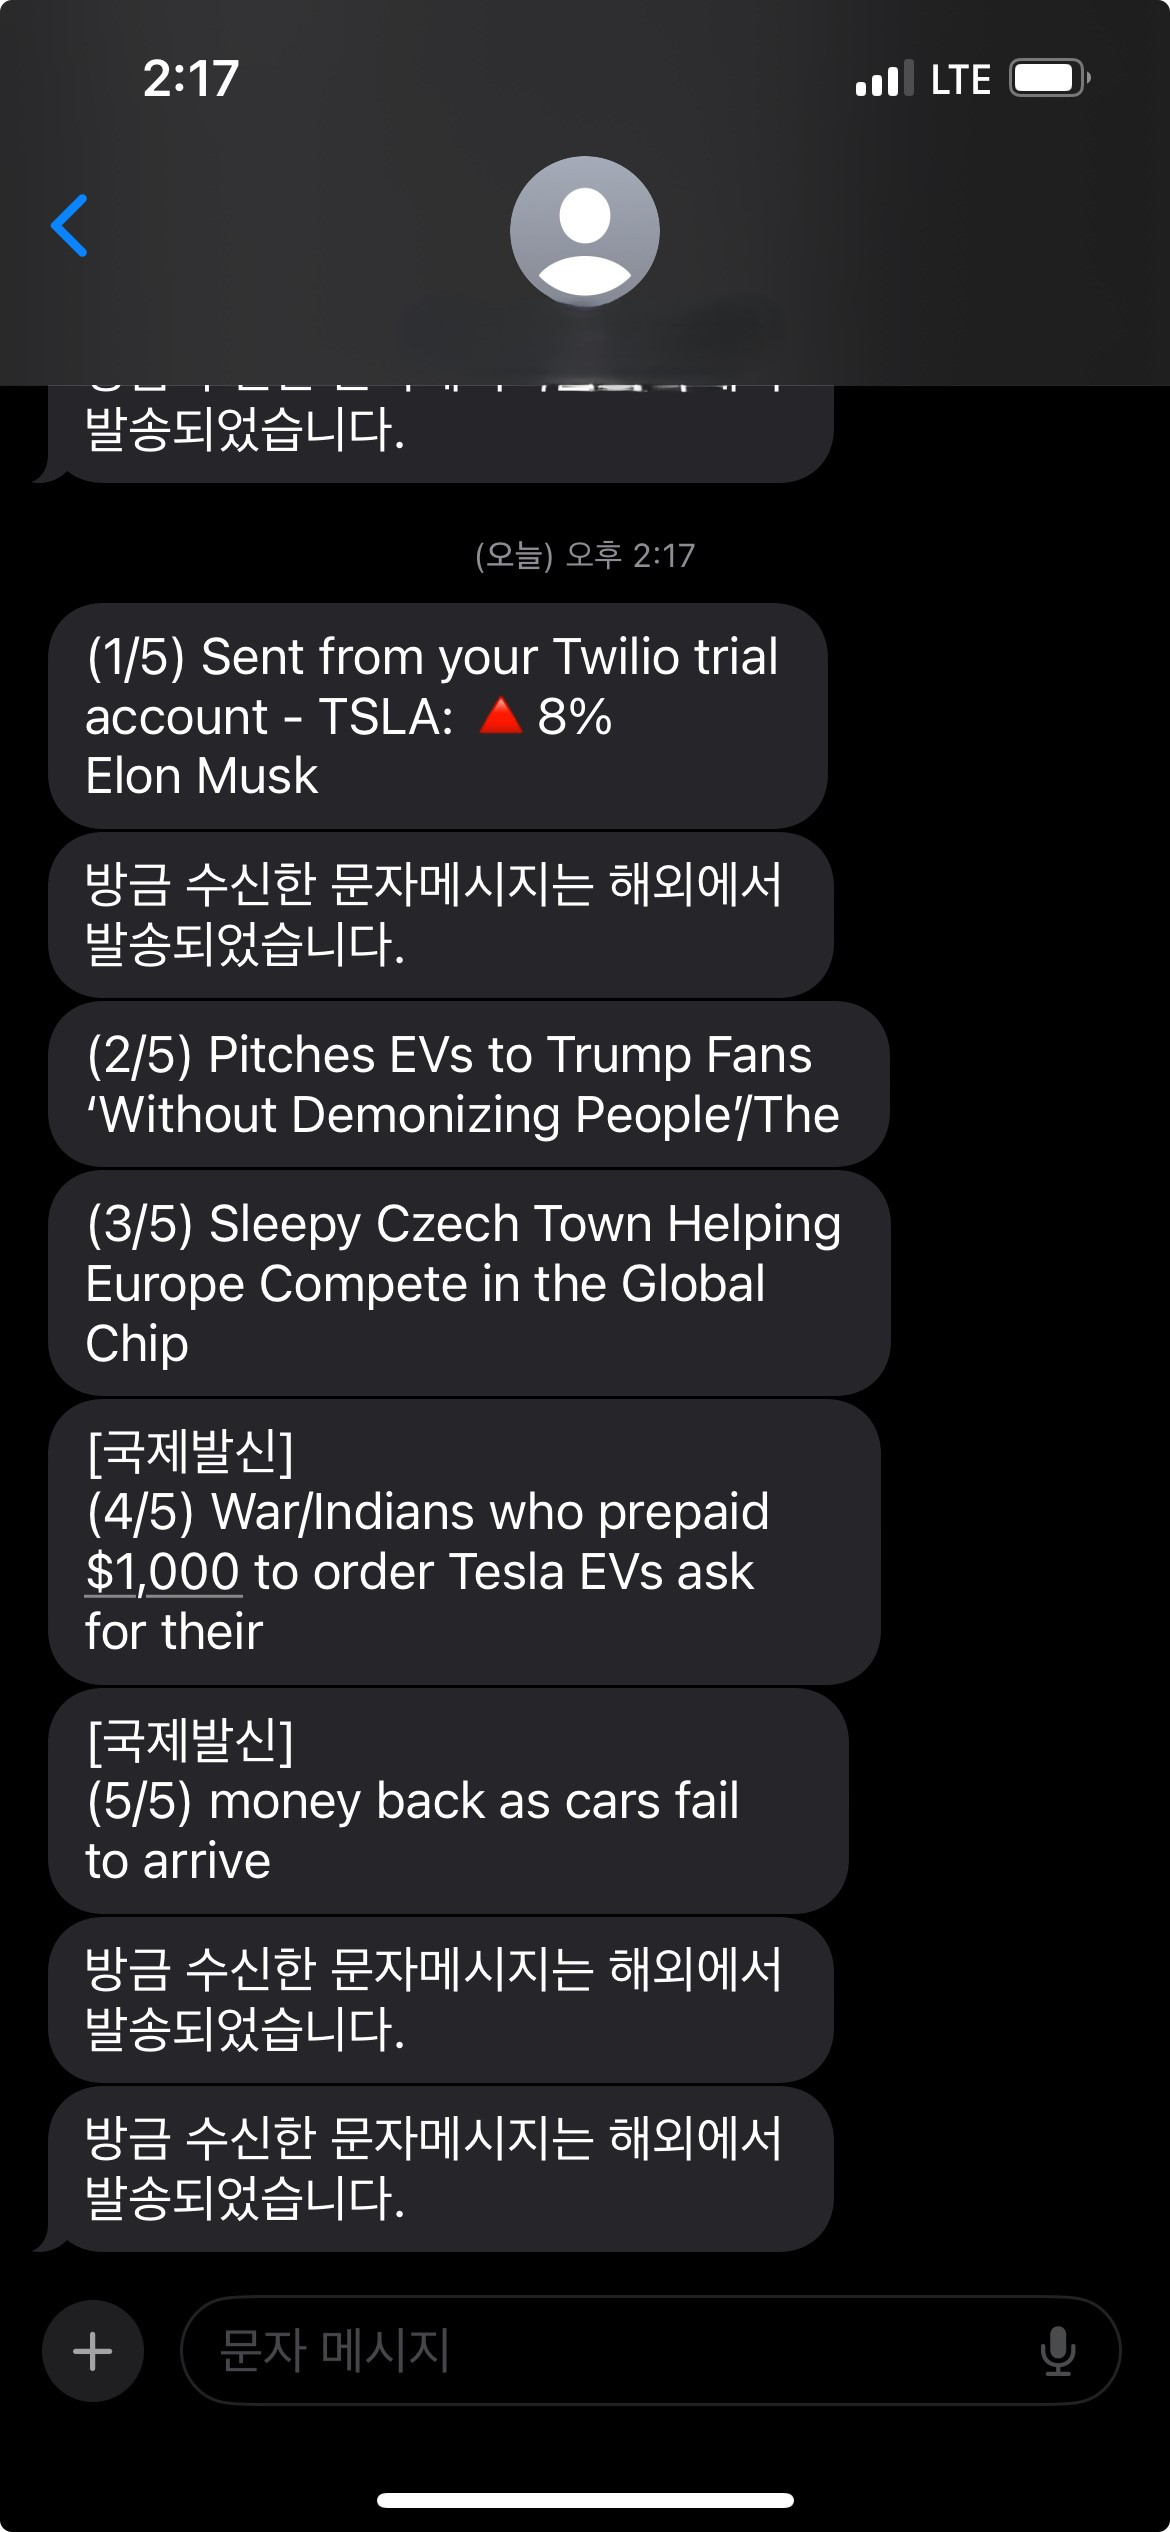

In [3]:
# day36_Stock News Monitoring Project_240814
from PIL import Image
from IPython.display import display
img = Image.open('stock_message.jpg')
display(img)

In [ ]:
# main.py_my solution
import requests
from datetime import date
from datetime import timedelta


STOCK = "TSLA"
COMPANY_NAME = "Tesla Inc"

## STEP 1: Use https://www.alphavantage.co
# When STOCK price increase/decreases by 5% between yesterday and the day before yesterday then print("Get News").
ALPHAVANTAGE_Endpoint = "https://www.alphavantage.co/query"
ALPHAVANTAGE_API_KEY = "#####"
ALPHAVANTAGE_Parameters = {
    "function": "TIME_SERIES_DAILY",
    "symbol": STOCK,
    "outputsize": "compact",
    "apikey": ALPHAVANTAGE_API_KEY
}

response = requests.get(url=ALPHAVANTAGE_Endpoint, params=ALPHAVANTAGE_Parameters)
response.raise_for_status()
stock_data = response.json()
# print(stock_data)
yesterday_stock_price = float(stock_data["Time Series (Daily)"]
                              [list(stock_data["Time Series (Daily)"])[0]]["4. close"])
# print(yesterday_stock_price)  # 542.04
tdb_yesterday_stock_price = float(stock_data["Time Series (Daily)"]
                                  [list(stock_data["Time Series (Daily)"])[1]]["4. close"])
# print(tdb_yesterday_stock_price)  # 533.27
# abs(n) function: to make n absolute value
price_difference_percent = (yesterday_stock_price-tdb_yesterday_stock_price)/yesterday_stock_price*100
# print(price_difference_percent)  # 1.617961774038813


## STEP 2: Use https://newsapi.org
# Instead of printing ("Get News"), actually get the first 3 news pieces for the COMPANY_NAME. 

# get date of yesterday and tdb_yesterday
today = date.today()
yesterday = today-timedelta(days=1)
# print(yesterday)
tdb_yesterday = today-timedelta(days=2)
# print(tdb_yesterday)

def news_contents():
    NEWS_Endpoint = "https://newsapi.org/v2/everything"
    NEWS_API_KEY = "#####"
    NEWS_Parameters = {
        "q": COMPANY_NAME,
        "apiKey": NEWS_API_KEY,
        "from": yesterday,
        "sortBy": "relevancy",
        "language": "en"
    }

    response2 = requests.get(url=NEWS_Endpoint, params=NEWS_Parameters)
    response2.raise_for_status()
    news_data = response2.json()
    # print(news_data)

    news_data_top3 = news_data["articles"][0:3]
    news_data_top3_title = []
    for i in range(3):
        news_data_top3_title.append(news_data_top3[i]["title"])
    return news_data_top3_title


news_titles = []
if abs(price_difference_percent) >= 5:
    # print("Get News")
    news_titles = news_contents()


def message_content(percentage, news):
    arrow = ""
    if percentage > 0:
        arrow = f"🔺{round(percentage)}"
    else:
        arrow = f"🔻{round(percentage)}"
    full_content = f"{STOCK}: {arrow}%\n"
    full_content += f"{'/'.join(news)}"
    print(full_content)
    return full_content

## STEP 3: Use https://www.twilio.com
# Send a seperate message with the percentage change and each article's title and description to your phone number. 

from twilio.rest import Client
account_sid = "#####"
auth_token = "#####"

client = Client(account_sid, auth_token)

message = client.messages.create(
    messaging_service_sid="#####",
    body=message_content(price_difference_percent, news_titles),
    to='#####'
)

print(message.status)
print(message.sid)


#Optional: Format the SMS message like this: 
"""
TSLA: 🔺2%
Headline: Were Hedge Funds Right About Piling Into Tesla Inc. (TSLA)?. 
Brief: We at Insider Monkey have gone over 821 13F filings that hedge funds and prominent investors are required to file by the SEC The 13F filings show the funds' and investors' portfolio positions as of March 31st, near the height of the coronavirus market crash.
or
"TSLA: 🔻5%
Headline: Were Hedge Funds Right About Piling Into Tesla Inc. (TSLA)?. 
Brief: We at Insider Monkey have gone over 821 13F filings that hedge funds and prominent investors are required to file by the SEC The 13F filings show the funds' and investors' portfolio positions as of March 31st, near the height of the coronavirus market crash.
"""

# Reflection
# 1. Well done to read and utilize the document API site presented
# 2. the ways to make the list of key were different between me and teacher.
# I used list(dict) method but teacher used [value for (key, value) in dict] method.
# 3. teacher also used round function and abs function for the percentage
# 4. I made a function for the body of the message to get the value of percentage and news_title
# but teacher just made a string variable.

In [ ]:
# main.py_teacher solution
import requests
from twilio.rest import Client

VIRTUAL_TWILIO_NUMBER = "your virtual twilio number"
VERIFIED_NUMBER = "your own phone number verified with Twilio"

STOCK_NAME = "TSLA"
COMPANY_NAME = "Tesla Inc"

STOCK_ENDPOINT = "https://www.alphavantage.co/query"
NEWS_ENDPOINT = "https://newsapi.org/v2/everything"

STOCK_API_KEY = "YOUR OWN API KEY FROM ALPHAVANTAGE"
NEWS_API_KEY = "YOUR OWN API KEY FROM NEWSAPI"
TWILIO_SID = "YOUR TWILIO ACCOUNT SID"
TWILIO_AUTH_TOKEN = "YOUR TWILIO AUTH TOKEN"

## STEP 1: Use https://www.alphavantage.co/documentation/#daily
# When stock price increase/decreases by 5% between yesterday and the day before yesterday then print("Get News").

#Get yesterday's closing stock price
stock_params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": STOCK_NAME,
    "apikey": STOCK_API_KEY,
}

response = requests.get(STOCK_ENDPOINT, params=stock_params)
data = response.json()["Time Series (Daily)"]
data_list = [value for (key, value) in data.items()]
yesterday_data = data_list[0]
yesterday_closing_price = yesterday_data["4. close"]
print(yesterday_closing_price)

#Get the day before yesterday's closing stock price
day_before_yesterday_data = data_list[1]
day_before_yesterday_closing_price = day_before_yesterday_data["4. close"]
print(day_before_yesterday_closing_price)

#Find the positive difference between 1 and 2. e.g. 40 - 20 = -20, but the positive difference is 20. Hint: https://www.w3schools.com/python/ref_func_abs.asp
difference = float(yesterday_closing_price) - float(day_before_yesterday_closing_price)
up_down = None
if difference > 0:
    up_down = "🔺"
else:
    up_down = "🔻"

#Work out the percentage difference in price between closing price yesterday and closing price the day before yesterday.
diff_percent = round((difference / float(yesterday_closing_price)) * 100)
print(diff_percent)


    ## STEP 2: Instead of printing ("Get News"), actually get the first 3 news pieces for the COMPANY_NAME.

#Instead of printing ("Get News"), use the News API to get articles related to the COMPANY_NAME.
#If difference percentage is greater than 5 then print("Get News").
if abs(diff_percent) > 1:
    news_params = {
        "apiKey": NEWS_API_KEY,
        "qInTitle": COMPANY_NAME,
    }

    news_response = requests.get(NEWS_ENDPOINT, params=news_params)
    articles = news_response.json()["articles"]

    #Use Python slice operator to create a list that contains the first 3 articles. Hint: https://stackoverflow.com/questions/509211/understanding-slice-notation
    three_articles = articles[:3]
    print(three_articles)

    ## STEP 3: Use Twilio to send a seperate message with each article's title and description to your phone number.

    #Create a new list of the first 3 article's headline and description using list comprehension.
    formatted_articles = [f"{STOCK_NAME}: {up_down}{diff_percent}%\nHeadline: {article['title']}. \nBrief: {article['description']}" for article in three_articles]
    print(formatted_articles)
    #Send each article as a separate message via Twilio.
    client = Client(TWILIO_SID, TWILIO_AUTH_TOKEN)

    #TODO 8. - Send each article as a separate message via Twilio.
    for article in formatted_articles:
        message = client.messages.create(
            body=article,
            from_=VIRTUAL_TWILIO_NUMBER,
            to=VERIFIED_NUMBER
        )